In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("wellbeing_and_lifestyle_data_kaggle.csv")


In [3]:
data.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [4]:
data.columns=data.columns.str.lower()

In [5]:
data.shape

(15972, 24)

In [6]:
data.dtypes

timestamp                   object
fruits_veggies               int64
daily_stress                object
places_visited               int64
core_circle                  int64
supporting_others            int64
social_network               int64
achievement                  int64
donation                     int64
bmi_range                    int64
todo_completed               int64
flow                         int64
daily_steps                  int64
live_vision                  int64
sleep_hours                  int64
lost_vacation                int64
daily_shouting               int64
sufficient_income            int64
personal_awards              int64
time_for_passion             int64
weekly_meditation            int64
age                         object
gender                      object
work_life_balance_score    float64
dtype: object

In [7]:
data.daily_stress.apply(lambda x: x.isnumeric())

0        True
1        True
2        True
3        True
4        True
         ... 
15967    True
15968    True
15969    True
15970    True
15971    True
Name: daily_stress, Length: 15972, dtype: bool

In [8]:
np.sum(data.isna())

timestamp                  0
fruits_veggies             0
daily_stress               0
places_visited             0
core_circle                0
supporting_others          0
social_network             0
achievement                0
donation                   0
bmi_range                  0
todo_completed             0
flow                       0
daily_steps                0
live_vision                0
sleep_hours                0
lost_vacation              0
daily_shouting             0
sufficient_income          0
personal_awards            0
time_for_passion           0
weekly_meditation          0
age                        0
gender                     0
work_life_balance_score    0
dtype: int64

In [9]:
data=data.drop(['timestamp','age','gender','work_life_balance_score'], axis = 1)

In [10]:
data.head(50)

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
0,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5
1,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6
2,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3
3,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0
4,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5
5,3,2,3,9,10,10,2,3,1,6,1,7,10,8,0,2,2,10,8,3
6,4,2,10,6,10,10,3,5,2,8,8,7,5,7,10,0,2,10,8,10
7,3,4,5,3,5,7,4,0,1,8,2,8,10,6,0,2,2,8,2,2
8,5,3,6,4,3,3,5,4,1,10,2,1,5,10,0,2,2,10,3,10
9,4,4,2,6,10,10,0,4,2,3,2,3,0,6,0,0,1,3,8,1


In [11]:
data.shape

(15972, 20)

In [12]:
data.daily_stress.dtypes

dtype('O')

In [13]:
data[data['daily_stress']=='1/1/2000']

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
10005,3,1/1/2000,1,2,10,10,5,5,2,6,8,6,3,6,10,1,2,10,8,2


In [14]:
data.index

RangeIndex(start=0, stop=15972, step=1)

In [15]:
data= data.drop(index= 10005)

In [16]:
data.daily_stress= data.daily_stress.astype(int)

In [17]:
data.daily_stress.dtypes

dtype('int32')

In [18]:
data.apply(['min','max'])

,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,todo_completed,flow,daily_steps,live_vision,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation
min,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
max,5,5,10,10,10,10,10,5,2,10,10,10,10,10,10,10,2,10,10,10


<AxesSubplot:xlabel='bmi_range'>

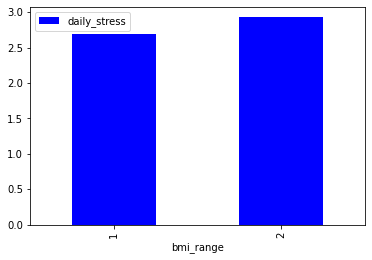

In [19]:
data[['bmi_range','daily_stress']].groupby('bmi_range').agg('mean').plot.bar(color='b')

<AxesSubplot:xlabel='sleep_hours'>

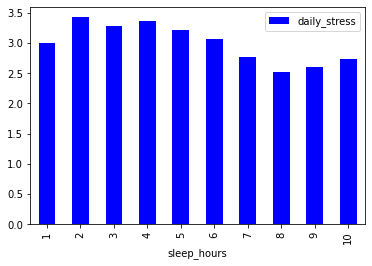

In [20]:
data[['sleep_hours','daily_stress']].groupby('sleep_hours').agg('mean').plot.bar(color='b')

In [21]:
data[['sleep_hours','daily_stress']].loc[data.sleep_hours==1]

,sleep_hours,daily_stress
1904,1,4
2968,1,2
2986,1,0
3007,1,5
3023,1,0
3376,1,5
3436,1,3
3437,1,3
3785,1,0
4763,1,5


<AxesSubplot:xlabel='daily_steps'>

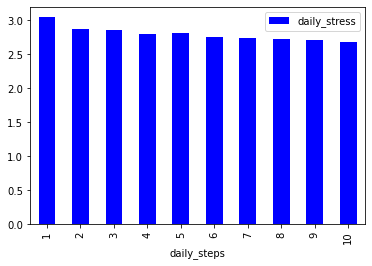

In [22]:
data[['daily_steps','daily_stress']].groupby('daily_steps').agg('mean').plot.bar(color='b')

<AxesSubplot:xlabel='fruits_veggies'>

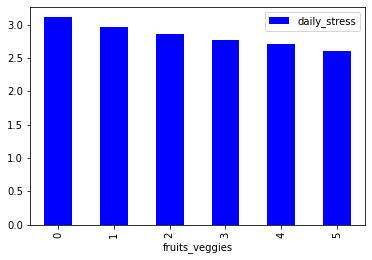

In [23]:
data[['fruits_veggies','daily_stress']].groupby('fruits_veggies').agg('mean').plot.bar(color='b')

In [24]:
correlation_data=data[['bmi_range','fruits_veggies','daily_steps','sleep_hours','daily_stress']]

In [25]:
correlation_data= correlation_data.corr(method='pearson')
correlation_data

,bmi_range,fruits_veggies,daily_steps,sleep_hours,daily_stress
bmi_range,1.000000,-0.092976,-0.131465,-0.098156,0.083110
fruits_veggies,-0.092976,1.000000,0.251213,0.103633,-0.094535
daily_steps,-0.131465,0.251213,1.000000,0.009218,-0.065511
sleep_hours,-0.098156,0.103633,0.009218,1.000000,-0.157037
daily_stress,0.083110,-0.094535,-0.065511,-0.157037,1.000000


<AxesSubplot:>

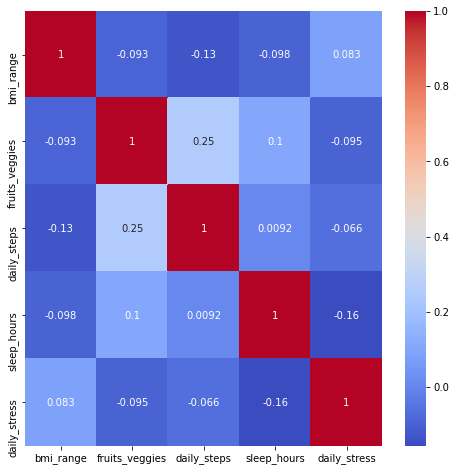

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_data,annot = True, cmap="coolwarm")

<AxesSubplot:xlabel='social_network'>

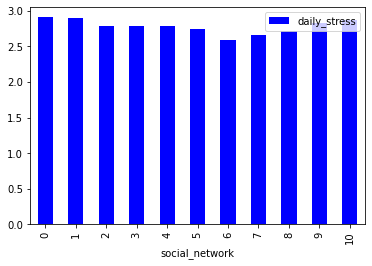

In [27]:
data[['social_network','daily_stress']].groupby('social_network').agg('mean').plot.bar(color='b')

<AxesSubplot:xlabel='places_visited'>

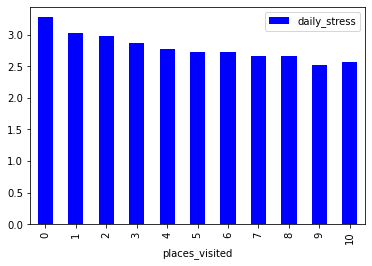

In [28]:
data[['places_visited','daily_stress']].groupby('places_visited').agg('mean').plot.bar(color='b')

<AxesSubplot:xlabel='core_circle'>

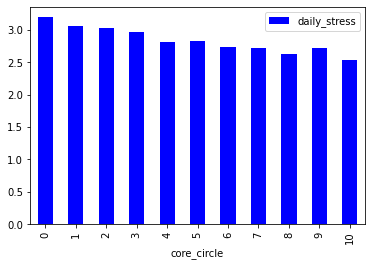

In [29]:
data[['core_circle','daily_stress']].groupby('core_circle').agg('mean').plot.bar(color='b')

In [30]:
correlation_data_2= data[['social_network','places_visited','core_circle','daily_stress']]

In [31]:
correlation_data_2 = correlation_data_2.corr(method='pearson')

<AxesSubplot:>

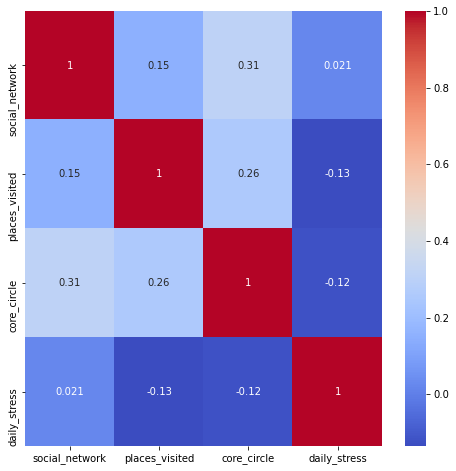

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_data_2, annot = True, cmap="coolwarm")